In [4]:
# libraries used
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

%matplotlib inline

In [5]:
data = pd.read_csv(r"C:\Users\kamci\python homework\Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding="ISO-8859-1")

In [6]:
data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9650,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9651,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9652,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [7]:
data2 = pd.read_csv(r"C:\Users\kamci\python homework\FAOSTAT_data_11-24-2020.csv")
data2


,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
0,2,Afghanistan,4.0,AF,AFG,NaN,NaN
1,5100,Africa,2.0,NaN,X06,NaN,NaN
2,284,Åland Islands,248.0,NaN,ALA,NaN,NaN
3,3,Albania,8.0,AL,ALB,NaN,NaN
4,4,Algeria,12.0,DZ,DZA,NaN,NaN
...,...,...,...,...,...,...,...
316,246,Yemen Ar Rp,886.0,NaN,NaN,NaN,NaN
317,247,Yemen Dem,720.0,NaN,NaN,NaN,NaN
318,248,Yugoslav SFR,890.0,NaN,NaN,NaN,1991.0
319,251,Zambia,894.0,ZM,ZMB,NaN,NaN


In [8]:
# removing nan values
groupingdata=data.dropna()

In [9]:
data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9650,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9651,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9652,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [10]:
# rename the Area column to country 
data=data.rename(columns={'Area':'Country'})
data=data[data['Element']=='Temperature change']
# delete columns which contain the various codes
data=data.drop(columns=['Area Code','Months Code','Element Code','Unit'])
# keep only the 12 months and get rid of the three month
TempC=data.loc[data.Months.isin(['January', 'February', 'March', 'April',
                                 'May', 'June', 'July','August', 'September', 
                                 'October', 'November', 'December'])]

In [11]:
TempC.head()

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,Temperature change,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,Temperature change,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [12]:
# data for Poland
PLN=TempC.loc[TempC.Country=='Poland']
PLN

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
5914,Poland,January,Temperature change,-0.080,2.793,-7.424,-0.863,2.071,-1.167,-0.836,...,-3.263,2.730,2.665,0.715,2.104,4.730,0.772,-0.194,4.441,1.887
5916,Poland,February,Temperature change,4.476,-0.108,-5.718,-1.908,-3.276,2.606,2.344,...,0.474,-0.772,-3.490,1.750,4.999,3.191,5.657,2.665,-0.681,5.406
5918,Poland,March,Temperature change,3.827,-3.072,-3.232,-4.554,-1.592,0.914,3.562,...,1.461,1.626,3.210,-3.037,5.040,3.535,2.555,4.536,-1.090,4.305
5920,Poland,April,Temperature change,2.384,2.483,0.296,0.610,-1.227,1.052,-0.018,...,1.180,2.999,1.527,0.629,2.731,0.824,1.632,0.123,5.134,2.392
5922,Poland,May,Temperature change,-0.945,-1.998,1.860,0.179,-2.384,0.999,1.257,...,0.179,1.112,2.084,2.037,1.064,0.204,2.234,1.380,4.219,0.055
5924,Poland,June,Temperature change,1.253,-1.843,0.215,2.588,-0.133,0.248,-0.252,...,0.568,1.614,0.255,1.203,-0.290,0.153,2.021,1.458,2.223,4.944
5926,Poland,July,Temperature change,-1.131,-1.828,1.628,0.364,-1.393,0.149,1.123,...,3.373,0.394,2.055,1.451,2.948,1.730,1.737,0.682,2.695,1.136
5928,Poland,August,Temperature change,-0.588,-0.324,1.496,-0.940,-1.408,-0.419,0.295,...,1.817,1.377,1.413,1.642,0.512,4.132,1.032,2.082,3.561,2.880
5930,Poland,September,Temperature change,1.382,-0.739,1.355,0.112,1.086,-0.877,2.354,...,-0.867,1.819,1.110,-0.973,1.475,1.577,2.749,0.526,2.334,1.167
5932,Poland,October,Temperature change,2.164,0.036,-0.230,-0.420,-0.623,2.731,2.596,...,-1.995,0.362,0.183,1.813,2.397,-0.427,-0.762,1.564,2.262,2.568


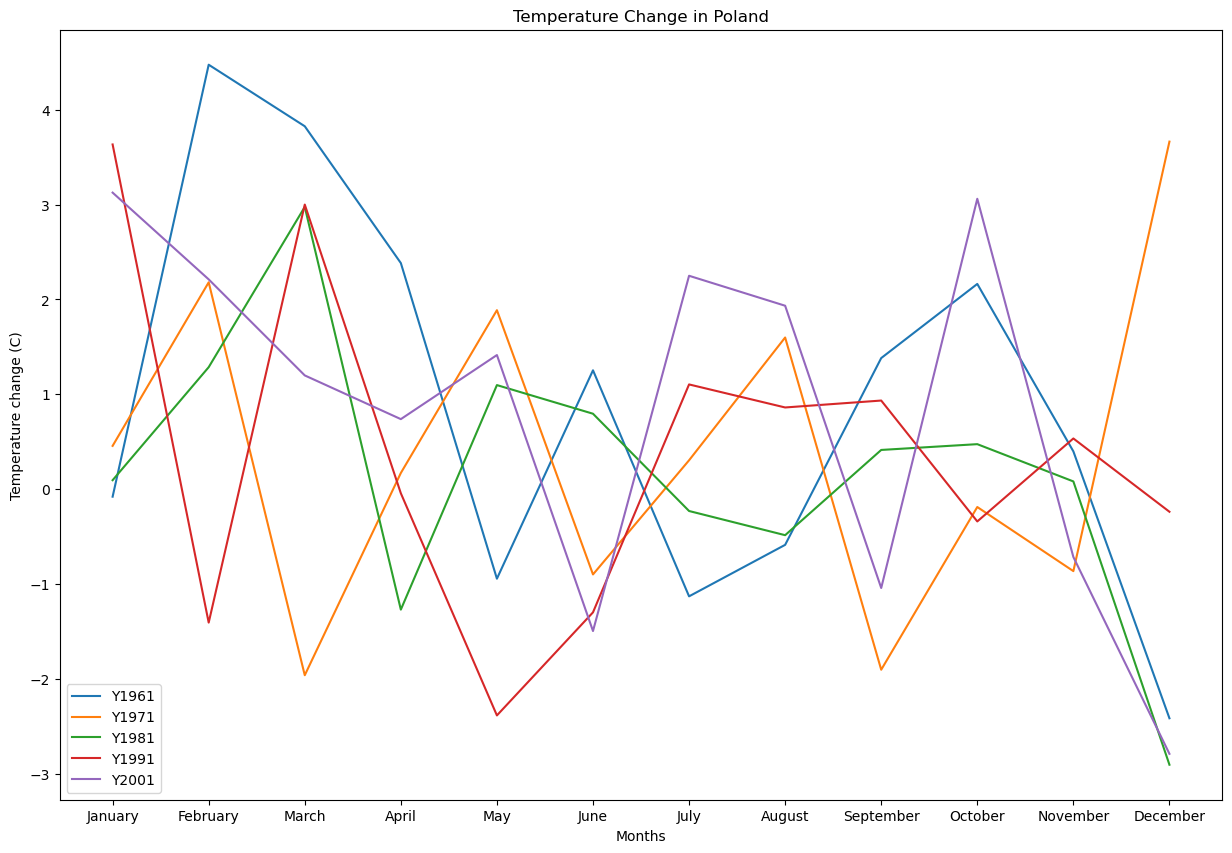

In [13]:
# plot to see how the temperature varies over the year for Poland

plt.figure(figsize=(15,10))
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1961.loc[PLN.Element=='Temperature change'], label='Y1961')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1971.loc[PLN.Element=='Temperature change'], label='Y1971')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1981.loc[PLN.Element=='Temperature change'], label='Y1981')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1991.loc[PLN.Element=='Temperature change'], label='Y1991')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y2001.loc[PLN.Element=='Temperature change'], label='Y2001')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Poland')
plt.show()

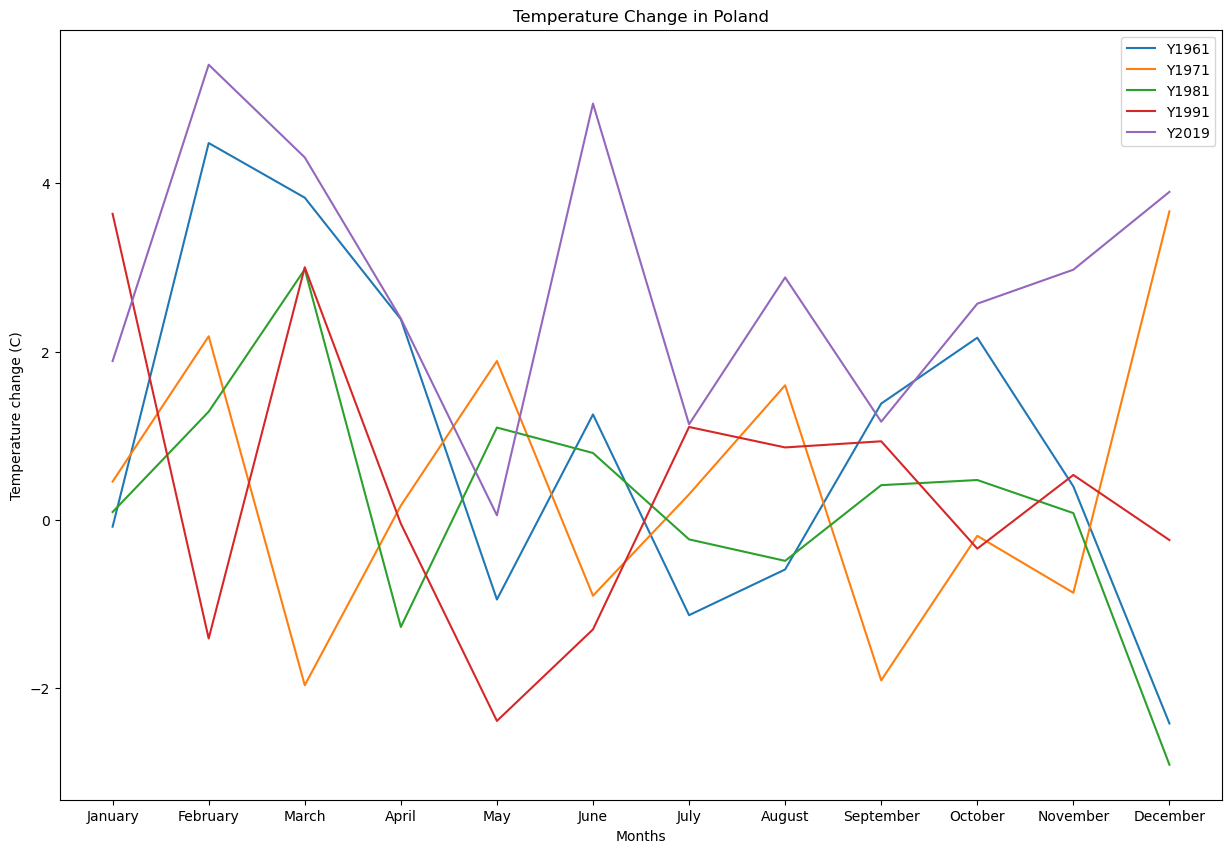

In [14]:
# plot to see how the temperature varies over the year for Poland

plt.figure(figsize=(15,10))
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1961.loc[PLN.Element=='Temperature change'], label='Y1961')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1971.loc[PLN.Element=='Temperature change'], label='Y1971')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1981.loc[PLN.Element=='Temperature change'], label='Y1981')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1991.loc[PLN.Element=='Temperature change'], label='Y1991')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y2019.loc[PLN.Element=='Temperature change'], label='Y2019')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Poland')
plt.show()

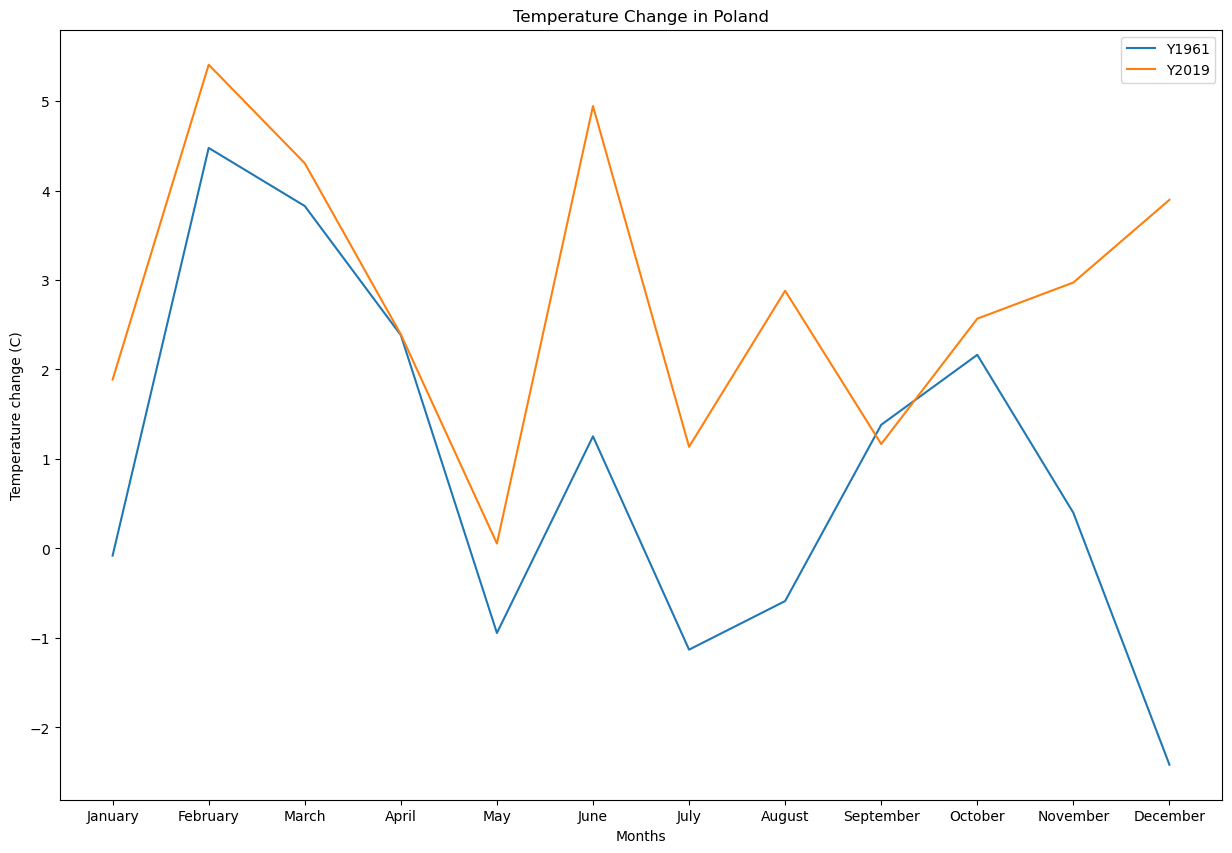

In [15]:
# plot to see how the temperature varies over the year for Poland

plt.figure(figsize=(15,10))
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1961.loc[PLN.Element=='Temperature change'], label='Y1961')

sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y2019.loc[PLN.Element=='Temperature change'], label='Y2019')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Poland')
plt.show()

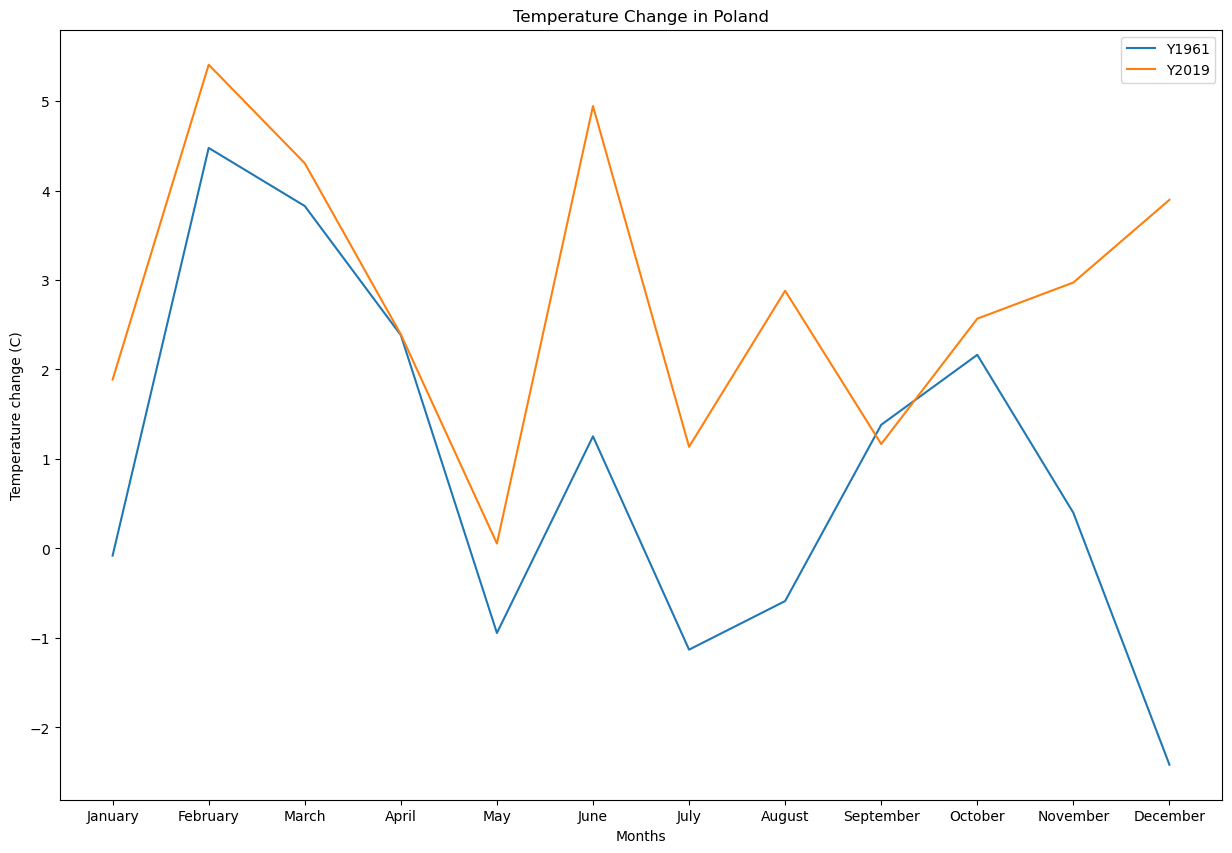

In [16]:
# plot to see how the temperature varies over the year for Poland

plt.figure(figsize=(15,10))
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1961.loc[PLN.Element=='Temperature change'], label='Y1961')

sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y2019.loc[PLN.Element=='Temperature change'], label='Y2019')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Poland')
plt.show()

In [17]:
# data for Poland
PLN=TempC.loc[TempC.Country=='Poland']
PLN

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
5914,Poland,January,Temperature change,-0.080,2.793,-7.424,-0.863,2.071,-1.167,-0.836,...,-3.263,2.730,2.665,0.715,2.104,4.730,0.772,-0.194,4.441,1.887
5916,Poland,February,Temperature change,4.476,-0.108,-5.718,-1.908,-3.276,2.606,2.344,...,0.474,-0.772,-3.490,1.750,4.999,3.191,5.657,2.665,-0.681,5.406
5918,Poland,March,Temperature change,3.827,-3.072,-3.232,-4.554,-1.592,0.914,3.562,...,1.461,1.626,3.210,-3.037,5.040,3.535,2.555,4.536,-1.090,4.305
5920,Poland,April,Temperature change,2.384,2.483,0.296,0.610,-1.227,1.052,-0.018,...,1.180,2.999,1.527,0.629,2.731,0.824,1.632,0.123,5.134,2.392
5922,Poland,May,Temperature change,-0.945,-1.998,1.860,0.179,-2.384,0.999,1.257,...,0.179,1.112,2.084,2.037,1.064,0.204,2.234,1.380,4.219,0.055
5924,Poland,June,Temperature change,1.253,-1.843,0.215,2.588,-0.133,0.248,-0.252,...,0.568,1.614,0.255,1.203,-0.290,0.153,2.021,1.458,2.223,4.944
5926,Poland,July,Temperature change,-1.131,-1.828,1.628,0.364,-1.393,0.149,1.123,...,3.373,0.394,2.055,1.451,2.948,1.730,1.737,0.682,2.695,1.136
5928,Poland,August,Temperature change,-0.588,-0.324,1.496,-0.940,-1.408,-0.419,0.295,...,1.817,1.377,1.413,1.642,0.512,4.132,1.032,2.082,3.561,2.880
5930,Poland,September,Temperature change,1.382,-0.739,1.355,0.112,1.086,-0.877,2.354,...,-0.867,1.819,1.110,-0.973,1.475,1.577,2.749,0.526,2.334,1.167
5932,Poland,October,Temperature change,2.164,0.036,-0.230,-0.420,-0.623,2.731,2.596,...,-1.995,0.362,0.183,1.813,2.397,-0.427,-0.762,1.564,2.262,2.568


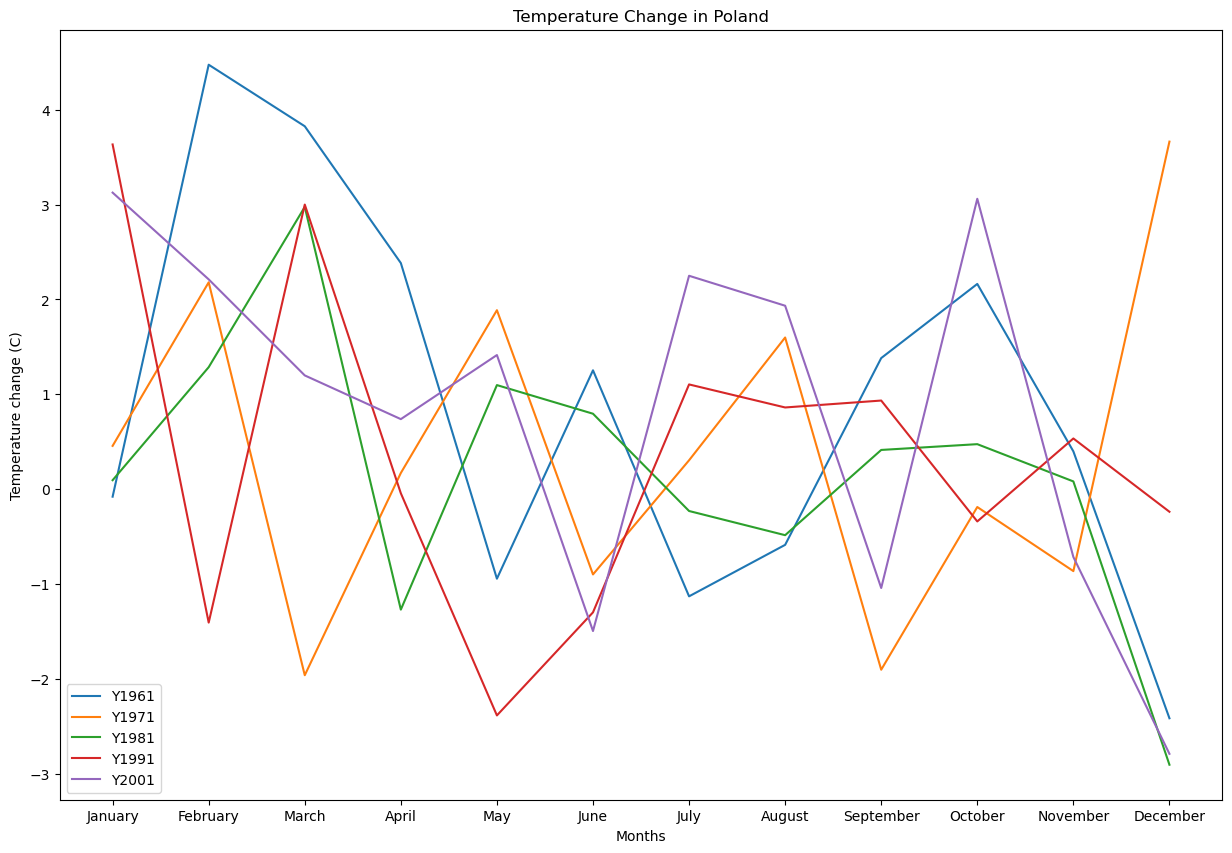

In [18]:
# plot to see how the temperature varies over the year for Poland

plt.figure(figsize=(15,10))
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1961.loc[PLN.Element=='Temperature change'], label='Y1961')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1971.loc[PLN.Element=='Temperature change'], label='Y1971')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1981.loc[PLN.Element=='Temperature change'], label='Y1981')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y1991.loc[PLN.Element=='Temperature change'], label='Y1991')
sns.lineplot(x=PLN.Months.loc[PLN.Element=='Temperature change'],y=PLN.Y2001.loc[PLN.Element=='Temperature change'], label='Y2001')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Poland')
plt.show()

In [19]:
# all the years in one column

PLN=PLN.melt(id_vars=['Country','Months','Element'],var_name='Year', value_name='TempC')
PLN['Year'] = PLN['Year'].str[1:].astype('str')
PLN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  708 non-null    object 
 1   Months   708 non-null    object 
 2   Element  708 non-null    object 
 3   Year     708 non-null    object 
 4   TempC    708 non-null    float64
dtypes: float64(1), object(4)
memory usage: 27.8+ KB


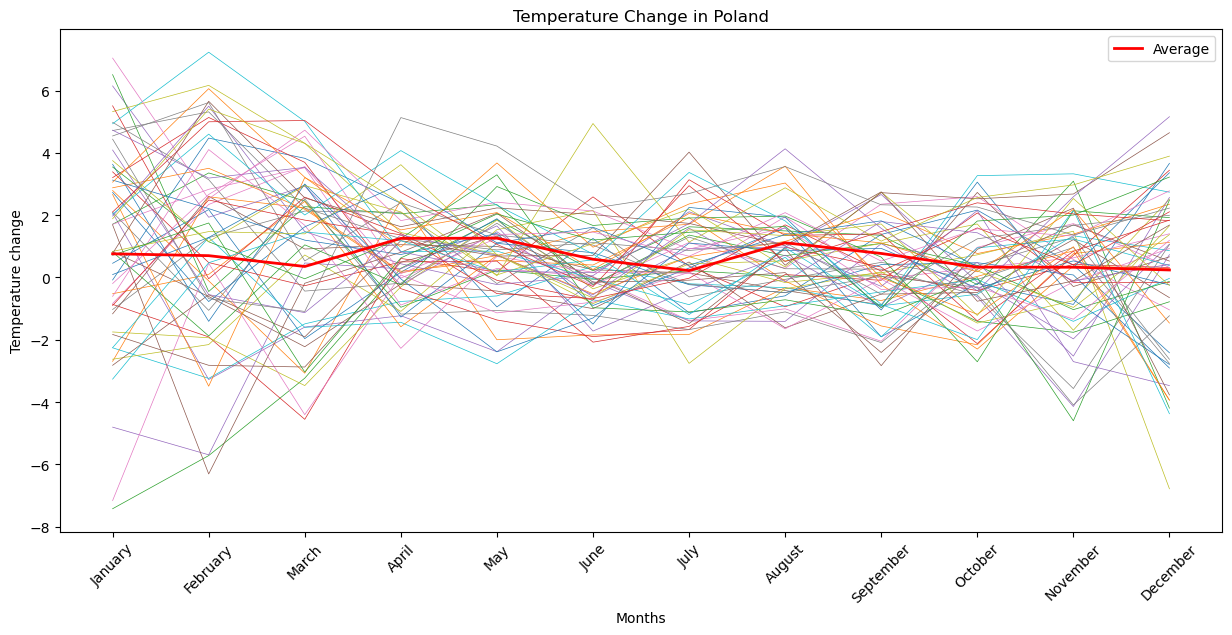

In [20]:
# temperature change over the years

plt.figure(figsize=(15,15))
plt.subplot(211)
for i in PLN.Year.unique():
    plt.plot(PLN.Months.loc[PLN.Year==str(i)].loc[PLN.Element=='Temperature change'],PLN.TempC.loc[PLN.Year==str(i)].loc[PLN.Element=='Temperature change'],linewidth=0.5)
plt.plot(PLN.Months.unique(),PLN.loc[PLN.Element=='Temperature change'].groupby(['Months']).mean(),'r',linewidth=2.0,label='Average')
plt.xlabel('Months',)
plt.xticks(rotation=45)
plt.ylabel('Temperature change')
plt.title('Temperature Change in Poland')
plt.legend()


plt.subplots_adjust(hspace=0.3)
plt.show()

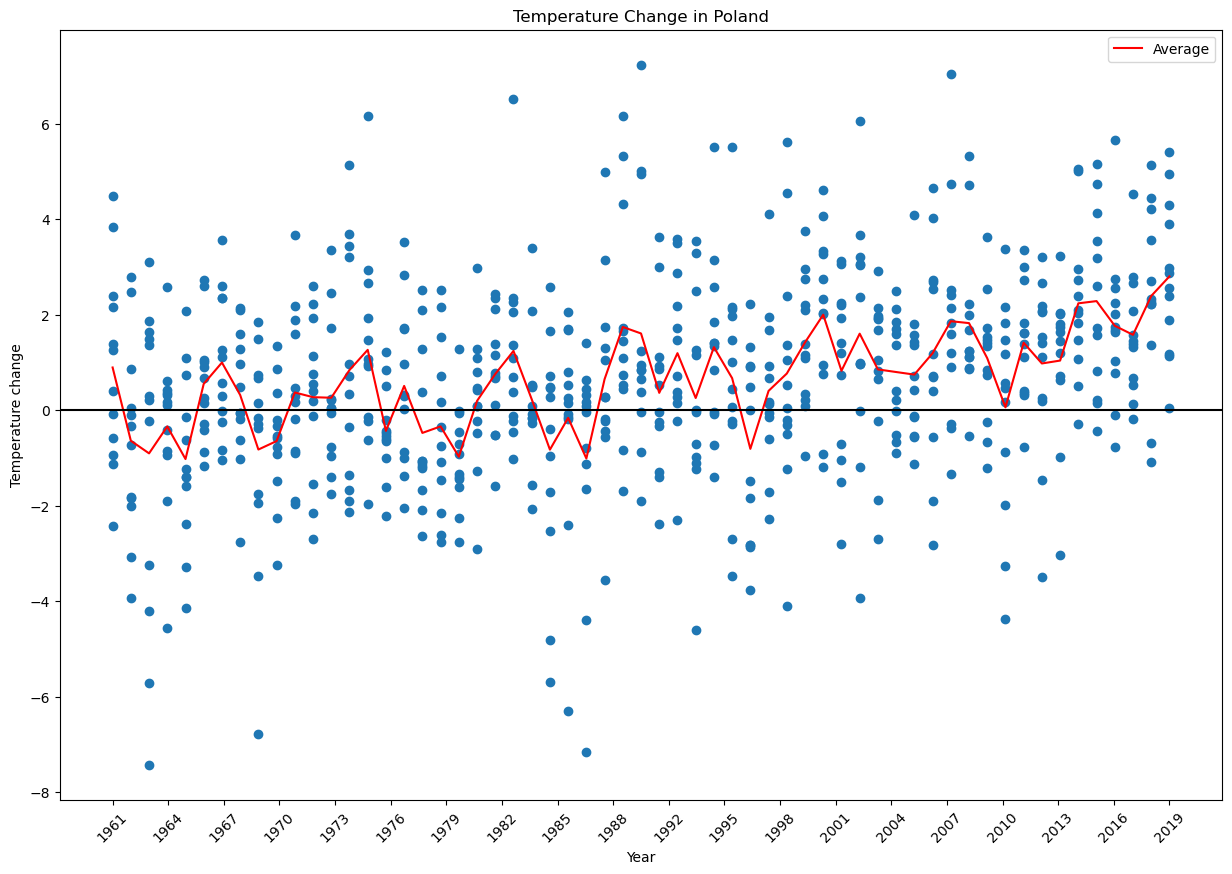

In [21]:
#  mean temperature changes

plt.figure(figsize=(15,10))
plt.scatter(PLN['Year'].loc[PLN.Element=='Temperature change'],PLN['TempC'].loc[PLN.Element=='Temperature change'])
plt.plot(PLN.loc[PLN.Element=='Temperature change'].groupby(['Year']).mean(),'r',label='Average')
plt.axhline(y=0.0, color='k', linestyle='-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,58,20),rotation=45)
plt.ylabel('Temperature change')
plt.legend()
plt.title('Temperature Change in Poland')
plt.show()

Text(0.5, 1.0, 'Temperature changes over past 60 years')

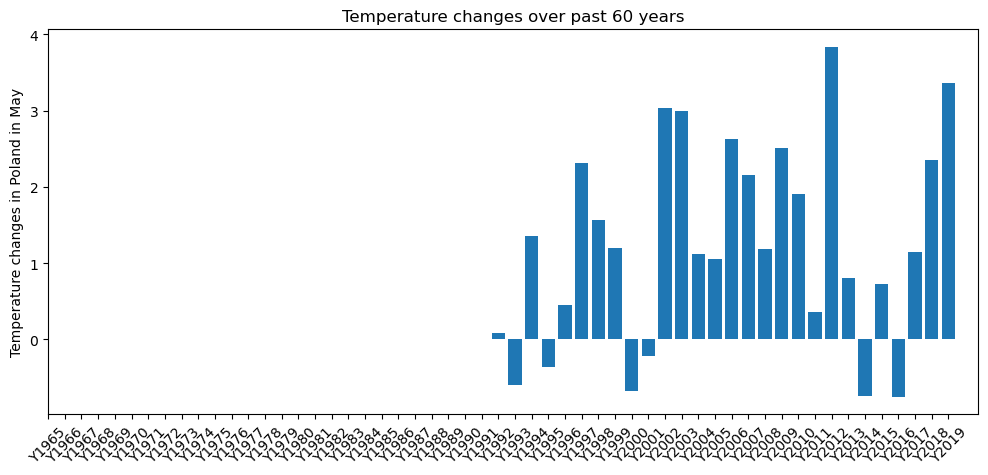

In [23]:
# random time series from the set, which illustrated the changes of temperature in Poland in May. 
# From the graph it looks like a stationary time series.
#This time series appeared increasing, thus didn't look stationary.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig, ax = plt.subplots(figsize=(12,5))

x_pos=np.arange(len(data.columns[7:]))
ax = plt.bar(x_pos ,data.iloc[246,7:], yerr=data.iloc[246,7])
plt.xticks(x_pos, data.columns[7:], rotation=45)
plt.ylabel('Temperature changes in Poland in May')
plt.title('Temperature changes over past 60 years')